# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты(-ки) гр. 0303 Торопыгин Антон и Тишкин Максим. Вариант №1.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.


## Основные теоретические положения

В теории цифровой обработки сигналов (ЦОС) принято разделять операции дискретизации по времени и квантования по уровню. Полагая операцию квантования отсутствующей, изучают дискретные сигналы и линейные дискретные системы (ЛДС), а затем, отдельано, - эффекты нелинейной операции квантования. 

Дискретным называют сигнал, дискретный по времени и непрерывный по состоянию (уровню), который описывается последовательностью чисел бесконечной разрядность $x(nT)$ или $x(n)$, называемой коротко последовательностью. Значения $nT, n \in Z_{+}$, называют дискретным временем, где $T$ - период дискретизации, а $n$ - дискретным нормированным временем. 

В теории ЦОС термины "дискретный сигнал" и "последовательность" употребляют в тождественном смысле. 

Цифровым называют сигнал, дискретный по времени и квантованный по состоянию (уровню), который описывается последовательностью чисел конечной разрядности - квантованной последовательностью $\tilde{x}(nT)$ или $\tilde{x}(n)$. При компьютерном моделировании под дискретным сигналом условно понимают последовательность чисел максимально возможной разрядности, а под цифровым - последовательность чисел заданной разрядности. 

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы


Прежде чем приступать к выполнению работы, проинициализируем необходимые переменные в соответствии с вариантом.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

def init_vars():
    variables = {'Nb': 1}

    variables['N'] = 30 + variables['Nb'] % 5
    variables['T'] = 0.0005 * (1 + variables['Nb'] % 3)
    variables['a'] = (-1) ** variables['Nb'] * (0.8 + 0.005 * (variables['Nb'] % 20))
    variables['C'] = 1 + variables['Nb'] % 5
    variables['w0'] = math.pi / (6 + variables['Nb'] % 5)
    variables['m'] = 5 + variables['Nb'] % 5
    
    return variables


vv = init_vars()
x = np.linspace(0, (vv['N'] - 1) * vv['T'])
x_norm = np.linspace(0, vv['N'] - 1, vv['N'])

1) Смоделируем единичный цифровой импульс $\delta_d(k)$:
   $$\delta_d(k) =
   \begin {cases}
       1, k = 0,\\
       0, k \ne 0,
   \end {cases}$$
Графики единичного цифрового импульса на интервале дискретного времени и дискретного нормированного времени представлены ниже.

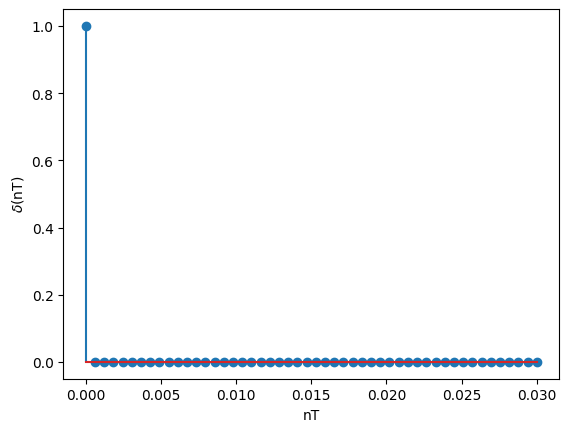

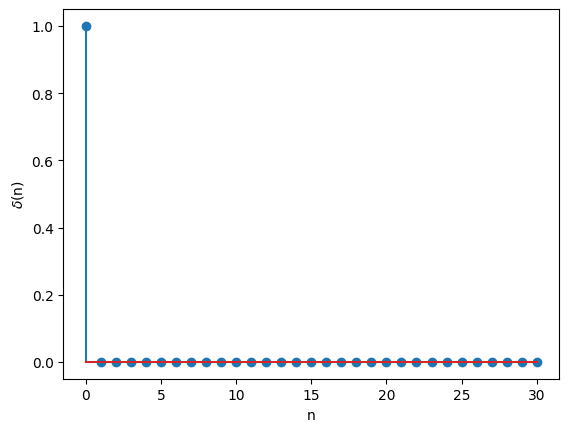

In [8]:
def dirak(_x, m=0):
    y = np.zeros(_x.shape)
    y[_x == m] = 1
    return y

def task1():

    plt.stem(x, dirak(x, 0))
    plt.ylabel(r'$\delta$(nT)')
    plt.xlabel('nT')
    plt.show()
    plt.stem(x_norm, dirak(x_norm, 0))
    plt.ylabel(r'$\delta$(n)')
    plt.xlabel('n')
    plt.show()

task1()

Взаимосвязь между дискретным и дискретным нормированным временем состоит в том, что дискретное нормированное время $n$ - это дискретное время $nT$ с периодом дискретизации $T = 1$.

Различием между цифровым единичным испульсом и функцией Дирака является то, что у единичного импульса амплитуда равна единице, а у функции Дирака - бесконечности. Функция Дирака бесконечно узкая и при этом имеет площадь, равную единице. 


   $$\delta_d(k) =
   \begin {cases}
       \infty, k = 0,\\
       0, k \ne 0,
   \end {cases}$$


2) Смоделируем дискретный единичный скачок $$\sigma_d(k):
\begin {equation*}
   \sigma_d(k) =
   \begin {cases}
       1, k \ge 0,\\
       0, k < 0,
   \end {cases}
   \end {equation*}$$
Графики дискретного единичного скачка на интервале дискретного времени и интервале дискретного нормированного времени показаны ниже.


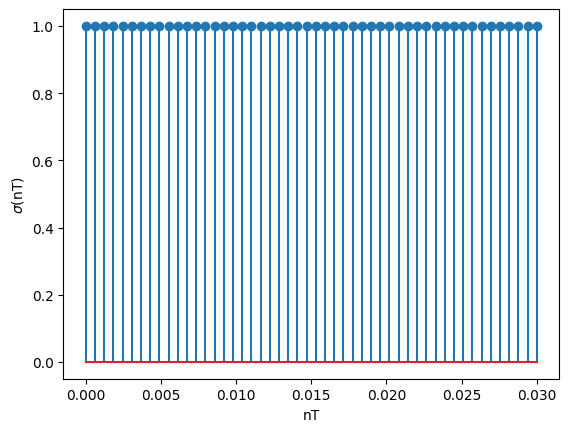

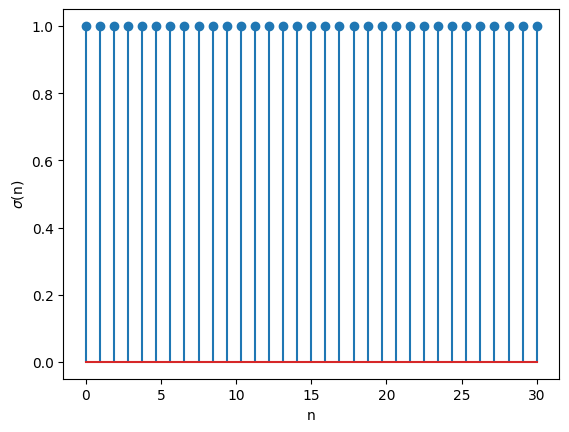

In [3]:
def hs(_x, m=0):
    return np.heaviside(_x - m, 1)

def task2():
    plt.stem(x, hs(x))
    plt.ylabel(r'$\sigma$(nT)')
    plt.xlabel('nT')
    plt.show()
    plt.stem(x_norm, hs(x_norm))
    plt.ylabel(r'$\sigma$(n)')
    plt.xlabel('n')
    plt.show()
    
task2()

Соответствие между цифровым и аналоговым единичными скачками заключается в том, что цифровой единичный скачок получается путём дискретизации аналогового единичного скачка. Реальный аналоговый сигнал можно приближенно представить некоторой суммой единичных скачков, возникающих в последовательные моменты времени. Устремив к нулю длительность интервала времени между единичными скачками, в пределе будет получаться точная огибающая исходного сигнада.

Частота дискретизации дискретного единичного скачка равна $f_д \ge 2f_в$, где $f_в$ - верхняя граница частоты спектра аналогового сигнала.

3) Смоделируем дискретную экспоненциальную функцию $$s_1(k):
   \begin {equation*}
   s_1(k, T) =
   \begin {cases}
       a^k, k \ge 0,\\
       0, k < 0,
   \end {cases}
   \end {equation*}$$
Графики дискретной экспоненциальной функции на интервале дискретного времени и дискретного нормированного времени представлены ниже.

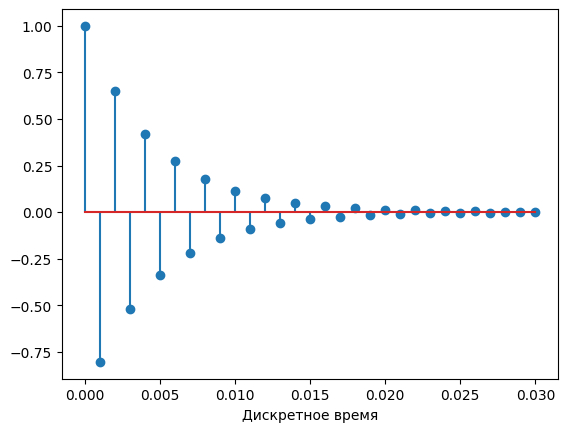

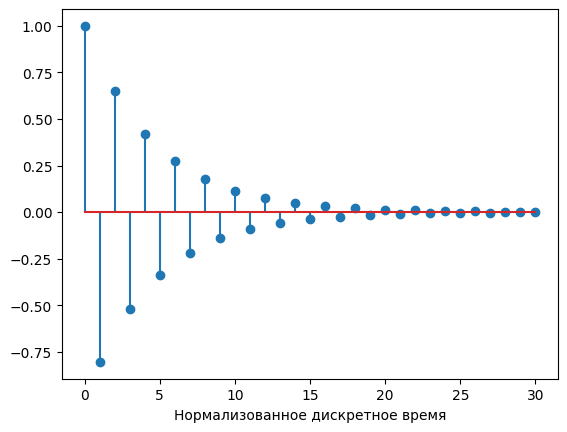

In [22]:
def task3():
    s = np.array([np.power(vv['a'], k) if k >=0 else 0 for k in x_norm])
    time = np.linspace(0, (vv['N'] - 1)* vv['T'], vv['N'])
    plt.stem(time, s)
    plt.xlabel("Дискретное время")
    plt.show()
    plt.stem(x_norm, s)
    plt.xlabel("Нормализованное дискретное время")
    plt.show()

task3()




Точки дискретной экспоненты находятся в местах, где для аналоговой экспоненты $a^k, k$ - целые.

Дискретная экспонента образуется в результате дискретизации экспоненты.

4) Смоделируем дискретный комплексный гармонический сигнал: $s_2(k) = C exp(j\hat{w}_0k)$. Графики дискретного комплексного гармонического сигнала вещественной и мнимой частей на интервале времени $n \in [0; N-1]$ представлены ниже. 

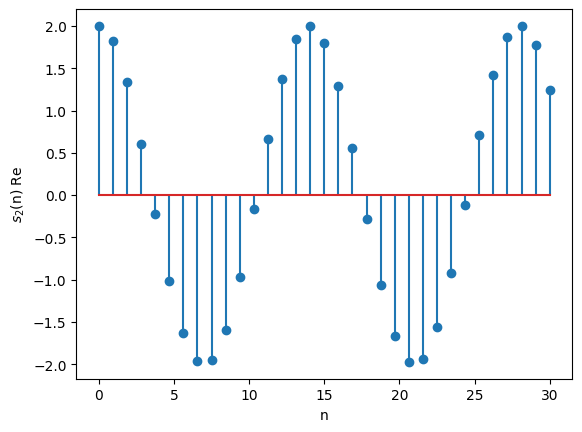

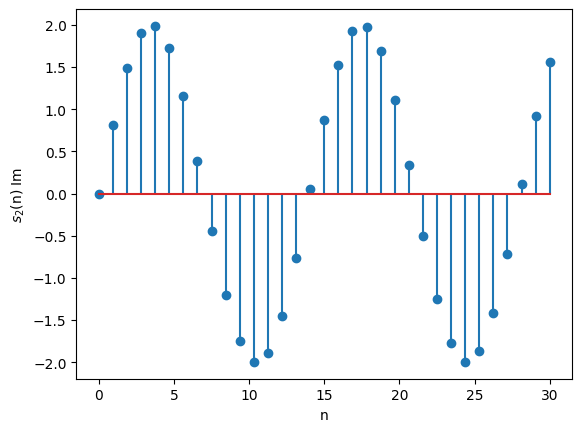

In [5]:
def exp2(_x, part='real'):
    ans = vv['C'] * np.exp(1j * vv['w0'] * _x)
    return ans.real if part == 'real' else ans.imag


def task4():
    plt.stem(x_norm, exp2(x_norm))
    plt.ylabel(r'$s_{2}$(n) Re')
    plt.xlabel('n')
    plt.show()
    plt.stem(x_norm, exp2(x_norm, 'imag'))
    plt.ylabel(r'$s_{2}$(n) Im')
    plt.xlabel('n')
    plt.show()

task4()

Данный сигнал можно записать в виде комбинации двух вещественных последовательностей: 
$$Re(x(k))=C cos(\omega Tk)$$, 
$$Im(x(k))=C sin(\omega Tk)$$

5) Выведем графики последовательностей $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$, задержанных на m отсчётов. Графики представлены ниже.

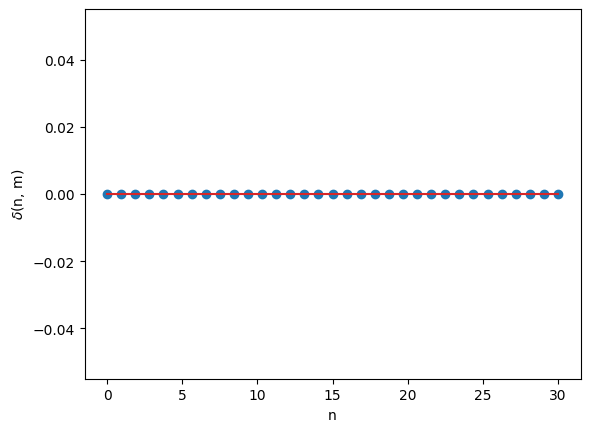

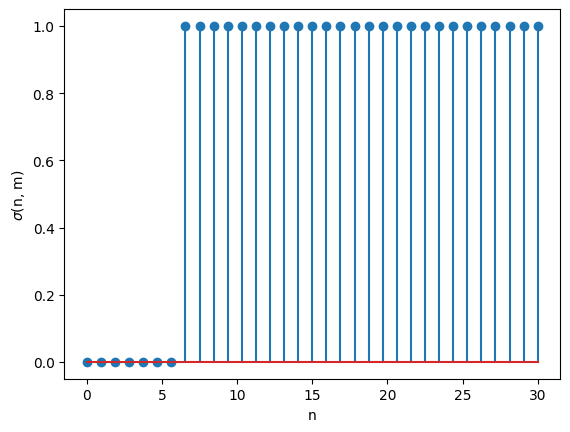

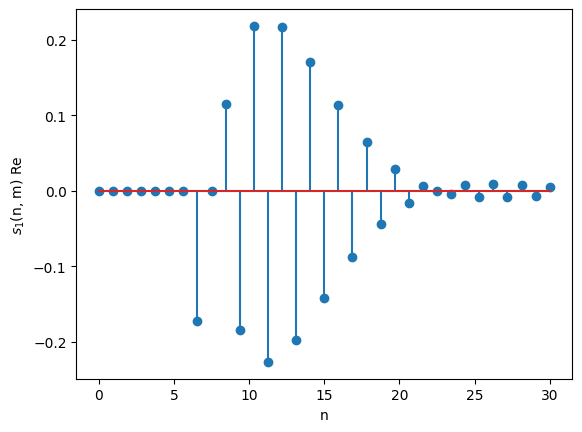

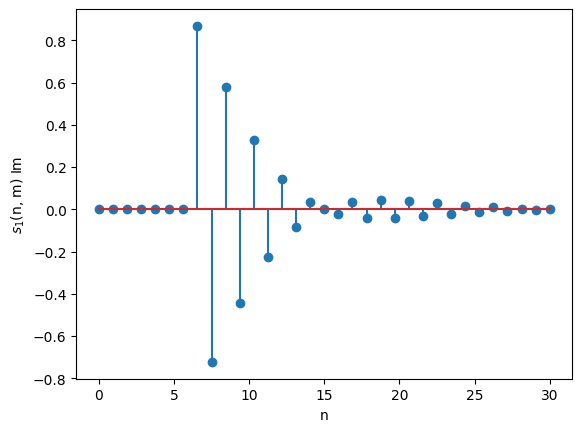

In [6]:
def task5():
    plt.stem(x_norm, dirak(x_norm, vv['m']))
    plt.ylabel(r'$\delta$(n, m)')
    plt.xlabel('n')
    plt.show()
    plt.stem(x_norm, hs(x_norm, vv['m']))
    plt.ylabel(r'$\sigma$(n, m)')
    plt.xlabel('n')
    plt.show()
    plt.stem(x_norm, exp(x_norm, vv['m'], 'real'))
    plt.ylabel(r'$s_{1}$(n, m) Re')
    plt.xlabel('n')
    plt.show()
    plt.stem(x_norm, exp(x_norm, vv['m'], 'imag'))
    plt.ylabel(r'$s_{1}$(n, m) Im')
    plt.xlabel('n')
    plt.show()
task5()

Формулу единичного импульса, задержанного на m отсчётов, можно записать следующим образом:
$$\delta_d(k - m) =
\begin {cases}
1, k = m , \\
0, k \ne m
\end {cases}$$

Формулу единичного скачка, задержанного на m отсчётов, можно записать следующим образом: 
$$\sigma_d(k - m) =
\begin {cases}
1, k \ge m , \\
0, k < m
\end {cases}$$

Формулу дискретной экспоненциальной функции, задержанной на m отсчётов, можно записать следующим образом:
$$s_1(k - m) =
\begin {cases}
a^{k-m}, k \ge m , \\
0, k < m
\end {cases}$$

## Выводы

Были изучены математические описания дискретных сигналов и получены навыки использования программных средств и их моделирования.

Был исследован цифровой единичный импульс $\delta_d$ на интервалах $n$ и $nT$ и на его примере изучена связь между дискретным и дескретным нормированным временем.

Был исследован цифровой единичный скачок $\sigma_d$, его частота дискретизации и соответствие с аналоговым единичным скачком.

Была исследована дискретная экспонента $s_1$ и её соответствие с аналоговой экспонентой. 
Был исследован дискретный гармонический сигнал $s_2$ и переписан в виде комбинации двух вещественных последовательностей.

Были исследованы задержанные последовательности на интервале $n$ и записаны их формулы.

Таким образом, в ходе работы были смоделированы различные дискретные сигналы и построены соответствующие графики.